<a href="https://colab.research.google.com/github/JVR27XD/MobileSAM/blob/main/TinySAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Instalar PyTorch (ajustado para Colab con GPU)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Instalar otras dependencias necesarias
!pip install opencv-python matplotlib tqdm git+https://github.com/openai/CLIP.git

Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 130.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s e

In [ ]:
# Limpiar instalaciones anteriores de torch y torchvision
!pip uninstall -y torch torchvision torchaudio

# Instalar versión específica de torch y torchvision
!pip install torch==1.10.2 torchvision==0.11.3

# Instalar matplotlib
!pip install matplotlib==3.5.1

# Instalar opencv para cargar imágenes (útil)
!pip install opencv-python tqdm


Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121
ERROR: Could not find a version that satisfies the requirement torch==1.10.2 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1)
ERROR: No matching distribution found for torch==1.10.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.5.1-cp311-cp311-linux_x86_64.whl size=11106204 sha256=e8c7654c2a00c072d57a75c06673c1e57bce64456b7f39dc30b71d87b5be680c
  Stored in d

In [ ]:
# Clonar el repo de TinySAM
!git clone https://github.com/xinghaochen/TinySAM.git

# Moverse al directorio del proyecto
%cd /content/TinySAM

fatal: destination path 'TinySAM' already exists and is not an empty directory.
/content/TinySAM


In [ ]:
# Instalar la última versión compatible de torch en Colab
!pip install torch torchvision torchaudio


In [ ]:
# Importar función build correcta
from tinysam.build_sam import build_sam_vit_t

# Detectar GPU o CPU
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Usando dispositivo: {device}')

# Construir el modelo
model = build_sam_vit_t()

# Cargar pesos
weights_path = '/content/drive/MyDrive/Colab Notebooks/TFG/TinySAM/tinysam_w8a8.pth'
model.load_state_dict(torch.load(weights_path, map_location=device))

# Preparar modelo
model.to(device)
model.eval()

print("✅ Modelo TinySAM cargado correctamente.")


Usando dispositivo: cuda


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL tinysam.modeling.sam.Sam was not an allowed global by default. Please use `torch.serialization.add_safe_globals([tinysam.modeling.sam.Sam])` or the `torch.serialization.safe_globals([tinysam.modeling.sam.Sam])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [ ]:
!pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 105.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.6.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.1 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.5.1 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


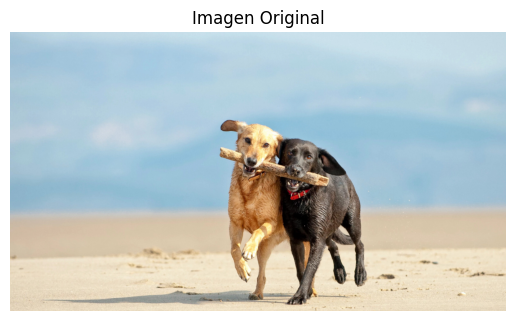

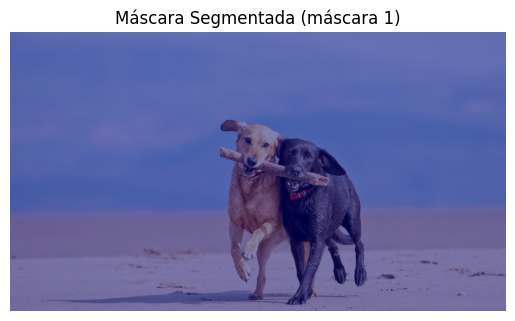

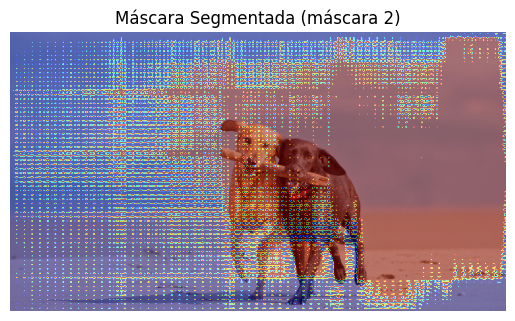

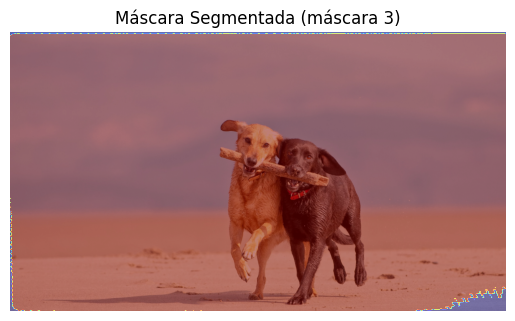

In [ ]:
# Ruta a una imagen en tu Drive
image_path = '/content/TinySAM/fig/dogs (1).jpg'

# Leer imagen
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as T

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar imagen original
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Imagen Original')
plt.show()

# Preprocesar imagen
transform = T.Compose([
    T.ToTensor(),
    T.Resize((1024, 1024)),  # TinySAM usa 1024x1024
])

input_tensor = transform(img_rgb).unsqueeze(0).to(device)

# Tamaño original
original_size = img_rgb.shape[:2]  # (alto, ancho)

# Hacer predicción
with torch.no_grad():
    masks = model([{
        "image": input_tensor.squeeze(0),
        "original_size": original_size
    }])

# Acceder a la máscara
mask_tensor = masks[0]['masks'][0]  # ✅ correcto

# Mostrar máscara
for i in range(3):
    plt.figure()
    plt.imshow(img_rgb)
    plt.imshow(mask_tensor[i].cpu().numpy(), alpha=0.5, cmap='jet')
    plt.axis('off')
    plt.title(f'Máscara Segmentada (máscara {i+1})')
    plt.show()


Mask tensor shape: torch.Size([3, 603, 1072])


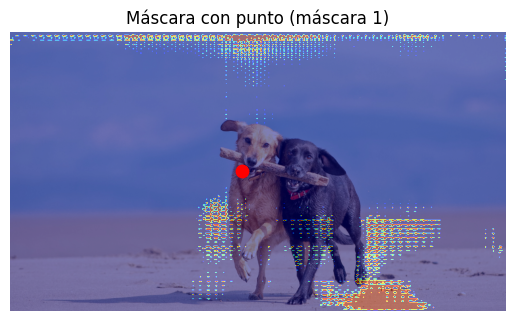

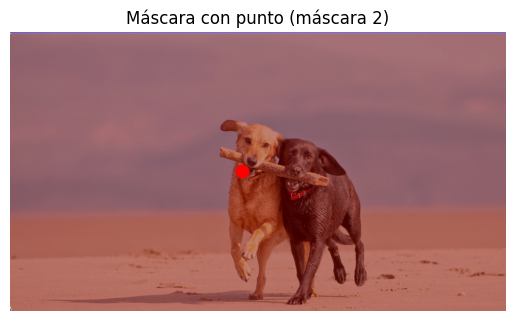

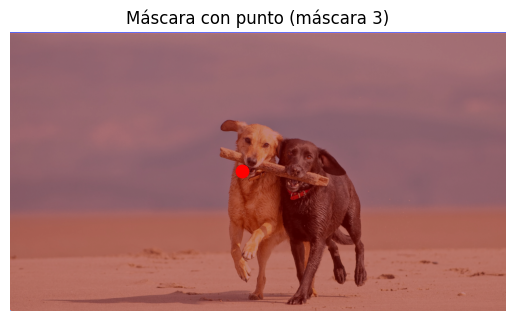

In [ ]:

# Definir un punto
point_coords = torch.tensor([[[500, 300]]], device=device)  # (1, 1, 2)
point_labels = torch.tensor([[1]], device=device)          # (1, 1)

# Hacer predicción con punto
with torch.no_grad():
    masks = model([{
        "image": input_tensor.squeeze(0),
        "original_size": original_size,
        "point_coords": point_coords,
        "point_labels": point_labels
    }])

# Extraer las máscaras y quitar dimensión batch
mask_tensor = masks[0]['masks'][0]  # (3, H, W)
print("Mask tensor shape:", mask_tensor.shape)

# Mostrar las 3 máscaras
for i in range(3):
    plt.figure()
    plt.imshow(img_rgb)
    plt.scatter(point_coords[0, :, 0].cpu(), point_coords[0, :, 1].cpu(), c='red', s=80, marker='o')
    plt.imshow((mask_tensor[i].cpu().numpy() > 0.5).astype(float), alpha=0.5, cmap='jet')
    plt.axis('off')
    plt.title(f'Máscara con punto (máscara {i+1})')
    plt.show()


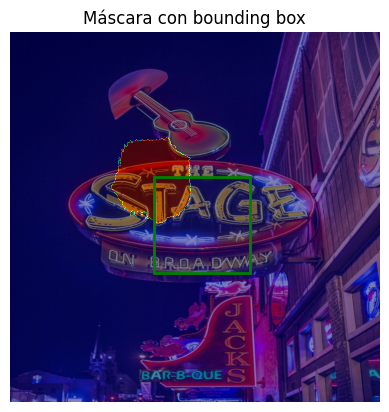

In [ ]:
# Definir bounding box [x1, y1, x2, y2] (en pixeles de imagen original)
box = torch.tensor([[[300, 300, 500, 500]]], device=device)  # (1, 1, 4)

# Hacer predicción con caja
with torch.no_grad():
    masks = model([{
        "image": input_tensor.squeeze(0),
        "original_size": original_size,
        "boxes": box
    }])

# Extraer máscara
mask_tensor = masks[0]['masks'][0]

# Mostrar máscara con caja
plt.imshow(img_rgb)
plt.gca().add_patch(plt.Rectangle(
    (box[0,0,0].cpu(), box[0,0,1].cpu()),
    box[0,0,2].cpu() - box[0,0,0].cpu(),
    box[0,0,3].cpu() - box[0,0,1].cpu(),
    edgecolor='green', facecolor='none', linewidth=2
))
plt.imshow((mask_tensor[0].cpu().numpy() > 0.5).astype(float), alpha=0.5, cmap='jet')
plt.axis('off')
plt.title('Máscara con bounding box')
plt.show()


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install opencv-python matplotlib==3.5.1 tqdm numpy==1.26.4

Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
import torch
from tinysam.build_sam import build_sam_vit_t

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Usando dispositivo: {device}')

# Construir el modelo
model = build_sam_vit_t()

# Ruta al checkpoint (el que funciona bien)
weights_path = '/content/drive/MyDrive/Colab Notebooks/TFG/TinySAM/tinysam.pth'

# Cargar state_dict
state_dict = torch.load(weights_path, map_location=device)
model.load_state_dict(state_dict)

# Preparar
model.to(device)
model.eval()

print("✅ Modelo TinySAM cargado correctamente.")



Usando dispositivo: cuda
✅ Modelo TinySAM cargado correctamente.


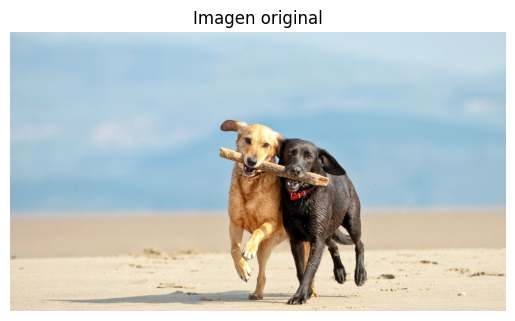

In [ ]:
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Ruta imagen
image_path = '/content/TinySAM/fig/dogs (1).jpg'

# Leer imagen
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Preprocesar imagen
transform = T.Compose([
    T.ToTensor(),
    T.Resize((1024, 1024))
])

input_tensor = transform(img_rgb).unsqueeze(0).to(device)
original_size = img_rgb.shape[:2]

# Ver imagen
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Imagen original')
plt.show()


Mask tensor shape: torch.Size([3, 603, 1072])


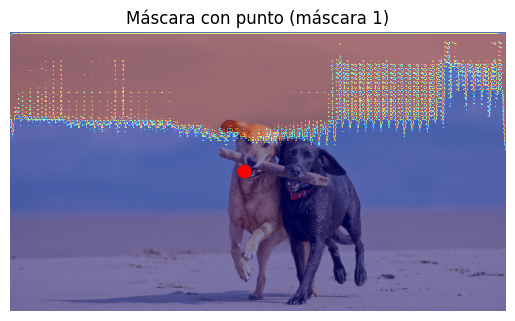

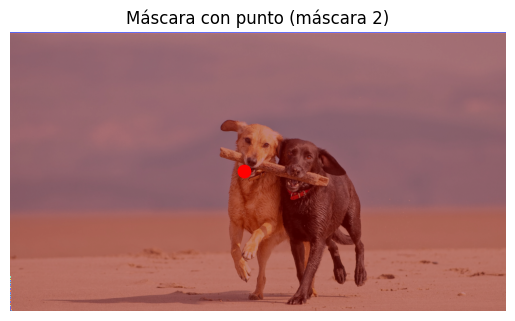

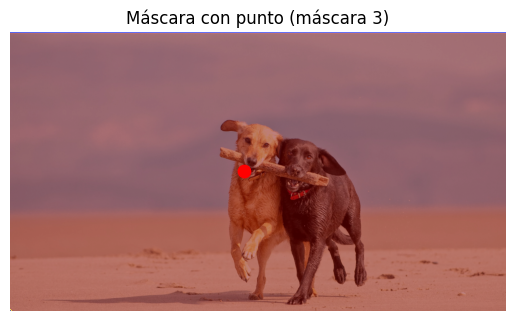

In [ ]:
# Definir un punto
point_coords = torch.tensor([[[505, 300]]], device=device)  # (1, 1, 2)
point_labels = torch.tensor([[1]], device=device)          # (1, 1)

# Hacer predicción
with torch.no_grad():
    masks = model([{
        "image": input_tensor.squeeze(0),
        "original_size": original_size,
        "point_coords": point_coords,
        "point_labels": point_labels
    }])

# Quitar batch
mask_tensor = masks[0]['masks'][0]
print("Mask tensor shape:", mask_tensor.shape)

# Mostrar las 3 máscaras
for i in range(3):
    plt.figure()
    plt.imshow(img_rgb)
    plt.scatter(point_coords[0, :, 0].cpu(), point_coords[0, :, 1].cpu(), c='red', s=80, marker='o')
    plt.imshow((mask_tensor[i].cpu().numpy() > 0.5).astype(float), alpha=0.5, cmap='jet')
    plt.axis('off')
    plt.title(f'Máscara con punto (máscara {i+1})')
    plt.show()
